<font size=6 color="blue"><b><center> Gentle Intro to Matplotlib and Seaborn libraries</center></b></font><br>
<font size=5 color="green"><i><center> Author : Nisha Kumaraswamy</center></i></font>
<br>

# <font size=5 color="red">Seaborn</font>
--------------------------------------------------------------------------------

# Introduction

Matplotlib as we already saw is often used by practicing data scientists for basic plots. Seaborn module is used for more advanced plots. It is commonly imported with the alias sns.  It is built on top of matplotlib and closely integrated with pandas data structures

## Improving Default Styles using Seaborn

An easy way to make your charts look beautiful is to use some default styles from the Seaborn library. These can be applied globally using the `sns.set_style` function. You can see a full list of predefined styles here: https://seaborn.pydata.org/generated/seaborn.set_style.html .
It is an excellent 2D and 3D graphics library for generating scientific figures. 

Pros of Seaborn are:

* Seaborn uses fewer syntax and has stunning default themes and Matplotlib is more easily customizable through accessing the classes.
* Seaborn is more comfortable in handling Pandas data frames and Matplotlib as we saw is very comfortable handling both numpy and pandas structures.

I encourage you just to explore the official Seaborn web page: https://seaborn.pydata.org/

## Installation 

You'll need to install seaborn (note its better to have matplotlib installed before using seaborn) first with either:

    conda install seaborn
or
    pip install seaborn
    
## Importing

Import the `seaborn` module under the name `sns`:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

# Problem Overview
Throughout this notebook, you will be performing certain well-defined tasks that’ll not only strengthen your concepts of matplotlib and seaborn, but will also help you learn a number of new concepts that are useful in analyzing, summarizing and visualizing data in the real world. 

# Context (same dataset that you saw in Yogita's `pandas` demo notebook)
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

# Data Set 
- Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex :- This is the policy holder's gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

# Data source
Download it here: https://raw.githubusercontent.com/nishamathi/SampleDatasets/main/AxisInsurance.csv

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [2]:
# Refresher on pandas
ins=pd.read_csv("https://raw.githubusercontent.com/nishamathi/SampleDatasets/main/AxisInsurance.csv")
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## displot (distplot) 

Helps visualizing the univariate or bivariate distribution of data
The displot (distplot) shows the distribution of a univariate set of observations.

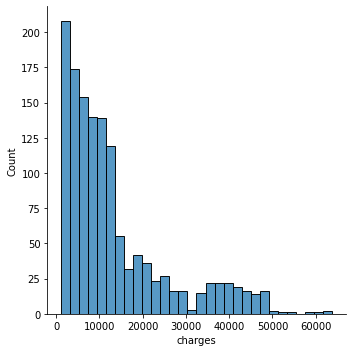

In [3]:
sns.displot(ins['charges'])

To add the kde (kernel density estimate) layer and also have the histogram use:

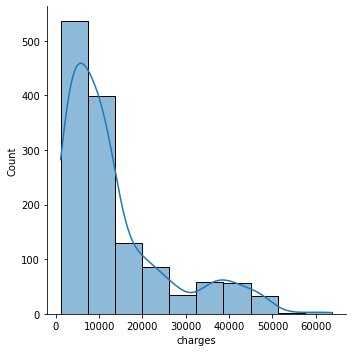

In [4]:
sns.displot(ins['charges'],kde=True,bins=10) # I am giving a wider bin size, be aware of how the bin size changes your KDE

## jointplot 

Helps visualizing the univariate or bivariate distribution of data
jointplot() allows you to basically match up two displots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

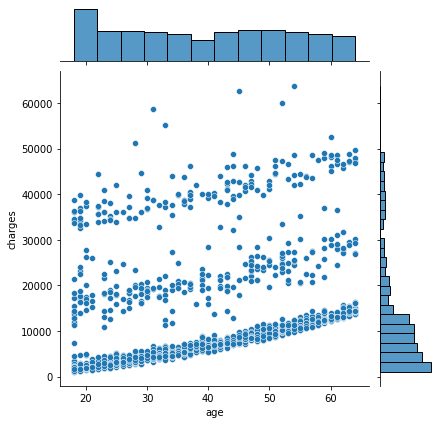

In [5]:
sns.jointplot(x='age',y='charges',data=ins,kind='scatter')

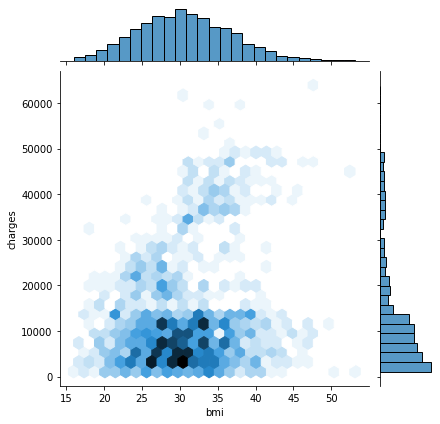

In [6]:
sns.jointplot(x='bmi',y='charges',data=ins,kind='hex')
# Hex is darker when there are certain number of points in that hex

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). It will take time for a larger dataframe. Here we are OK. 

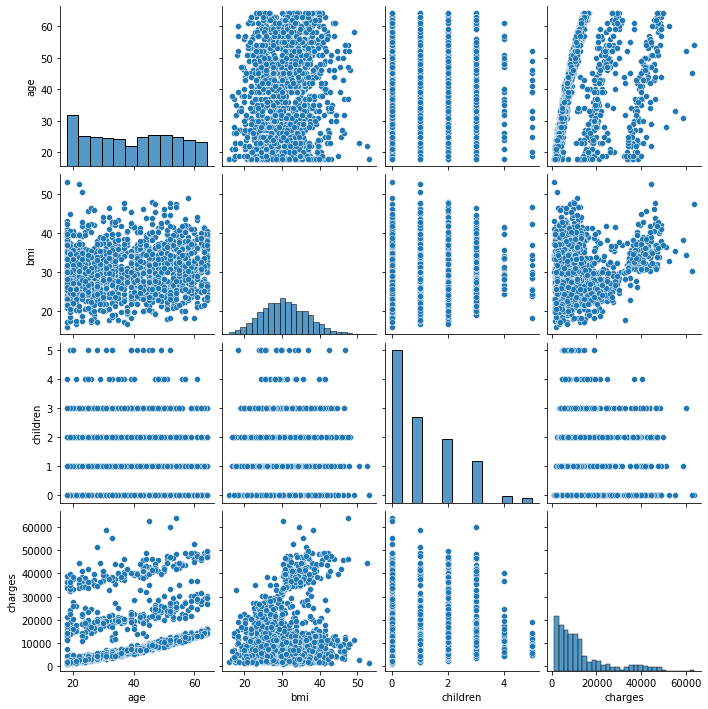

In [7]:
sns.pairplot(ins)

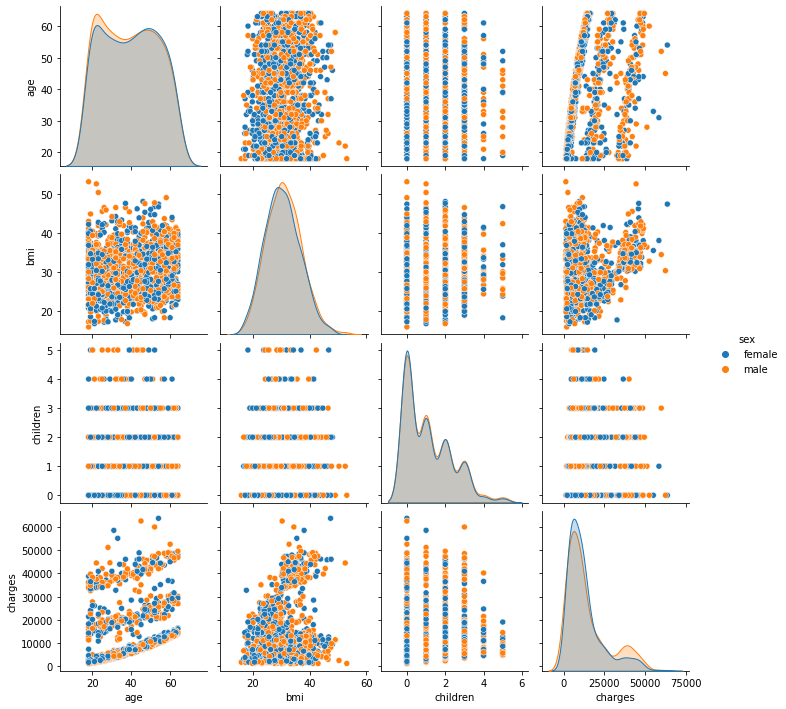

In [8]:
sns.pairplot(ins,hue='sex')
#sns.pairplot(ins,hue='sex',palette='coolwarm')

Some other useful plots under this category are rugplots and kdeplots. 

* Rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. 
* They are the building block of a KDE plot. kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). 
* These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

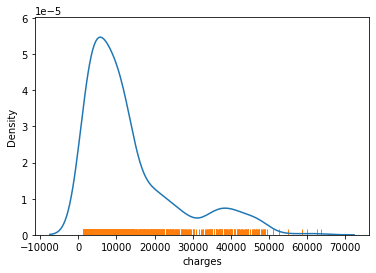

In [9]:
sns.kdeplot(ins['charges'])
sns.rugplot(ins['charges'])

# Categorical Data Plots

Using seaborn to plot categorical data! Categorical plots used mainly to see distributions of categorical columns such as sex here. Very similar to using the pandas function `nunique()` that gives a count of all distinct values in a column...  but in a visual manner.

There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean. Essentially same as `barplot` i.e gives the count of occurences in the data. So we only pass the x value as the estimator is just counting the occurences.

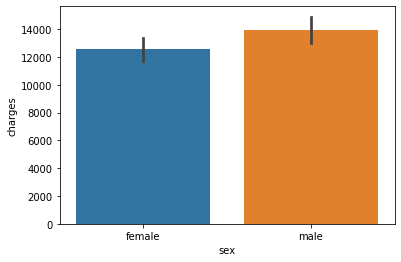

In [10]:
sns.barplot(x='sex', y='charges', data = ins)
# Shows that the average of male is slightly higher than the females.

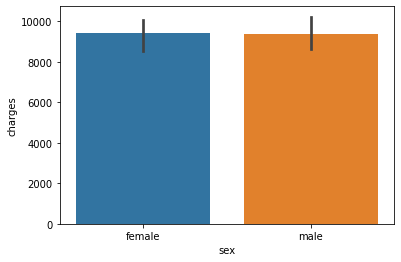

In [11]:
sns.barplot(x='sex', y='charges', data = ins, estimator=np.median)
# Shows that the median of male is same as the females.

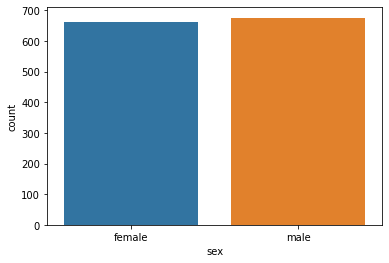

In [12]:
sns.countplot(x='sex',data=ins)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

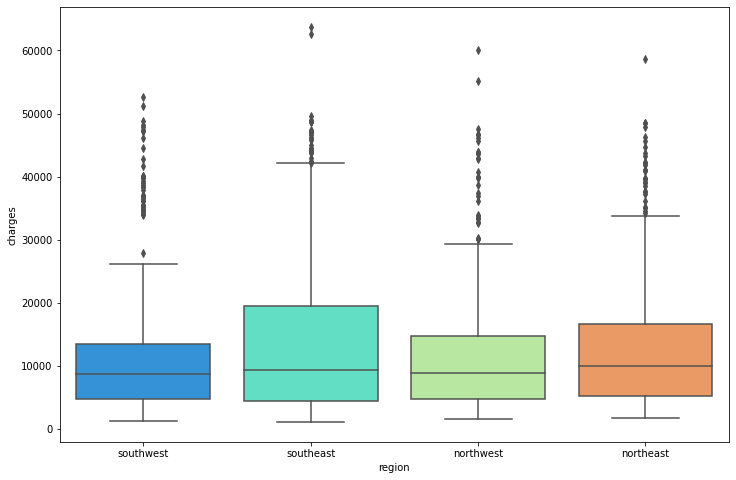

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x="region", y="charges", data=ins, palette='rainbow')

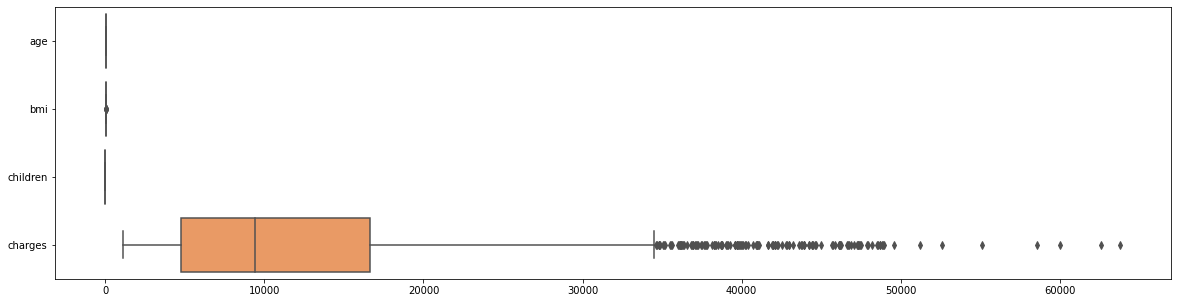

In [14]:
# Can do entire dataframe with orient='h'
plt.figure(figsize=(20,5))
sns.boxplot(data=ins,palette='rainbow',orient='h')

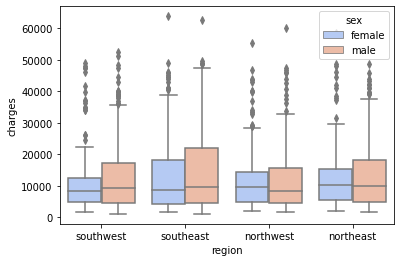

In [15]:
sns.boxplot(x="region", y="charges", hue="sex",data=ins, palette="coolwarm")

* A violin plot plays a similar role as a box and whisker plot. 
* It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.
* Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution. 
* The cost of using a violin vs box plot comes at the fact that it's harder to interpret in comparison to boxplot.

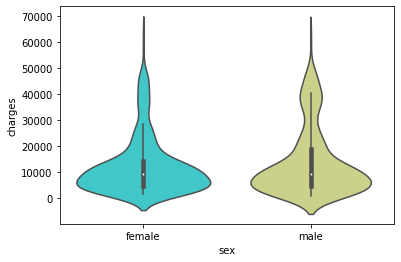

In [16]:
sns.violinplot(x="sex", y="charges", data=ins,palette='rainbow')

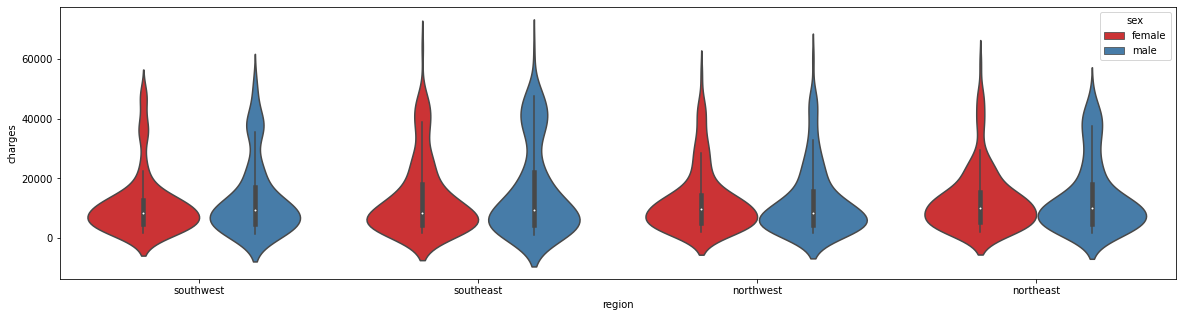

In [17]:
plt.figure(figsize=(20,5))
sns.violinplot(x="region", y="charges", data=ins,hue='sex',palette='Set1')

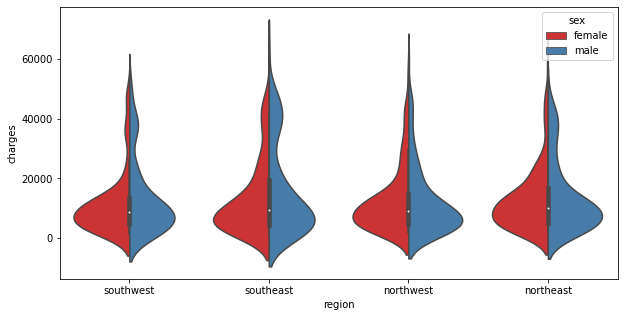

In [18]:
plt.figure(figsize=(10,5))
sns.violinplot(x="region", y="charges", data=ins,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

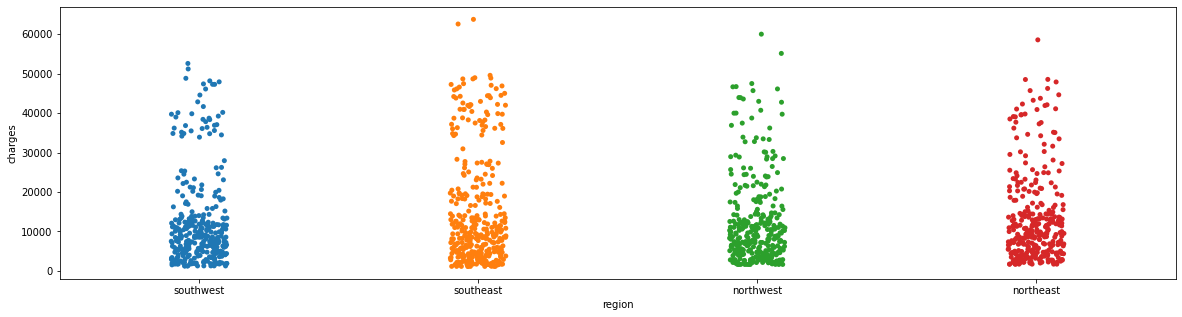

In [19]:
plt.figure(figsize=(20,5))
sns.stripplot(x="region", y="charges", data=ins,jitter=True)
#sns.stripplot(x="region", y="charges", data=ins,jitter=True, hue='sex')

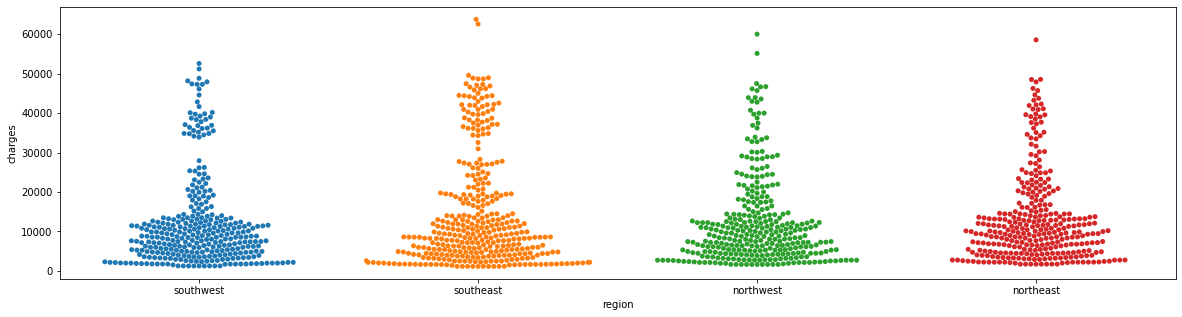

In [20]:
plt.figure(figsize=(20,5))
sns.swarmplot(x="region", y="charges", data=ins)

## Combining Categorical Plots

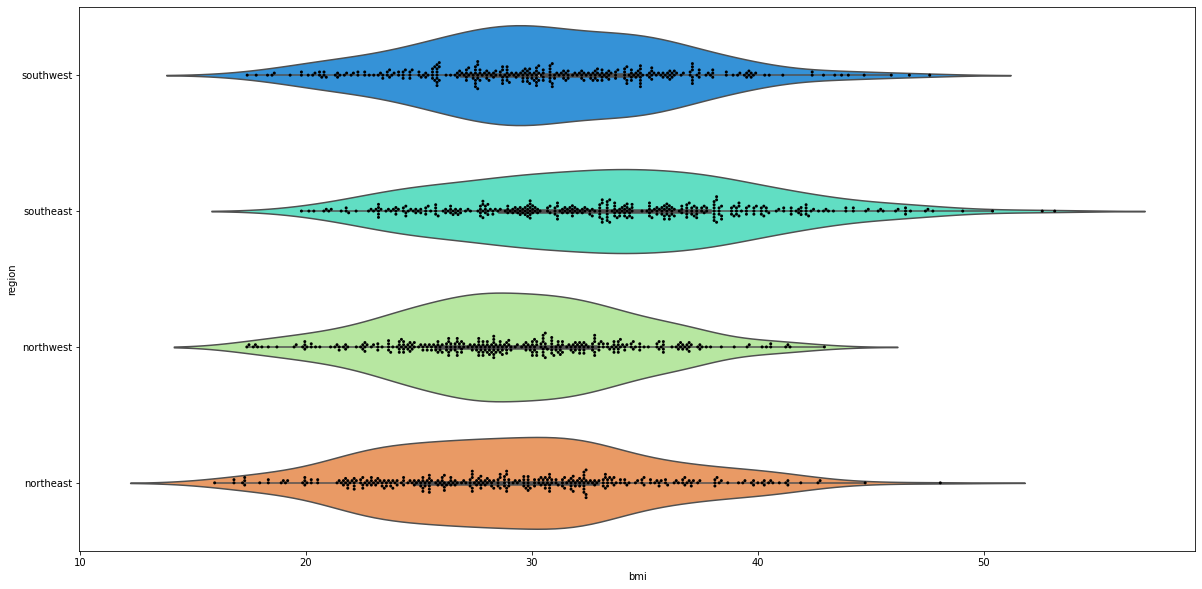

In [21]:
plt.figure(figsize=(20,10))
sns.violinplot(x="bmi", y="region", data=ins,palette='rainbow')
sns.swarmplot(x="bmi", y="region", data=ins,color='black',size=3)

*Lots of choices, so choose your plots depending on your audience (Business leaders vs analysts vs product manager etc.,)*

# Matrix plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data. 

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you.

In [22]:
ins.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


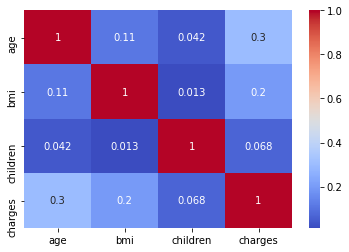

In [23]:
sns.heatmap(ins.corr(), annot=True, cmap='coolwarm')

To properly demonstrate heatmap with inference lets briefly look at another dataset called `Flights` a dataset available in `sns` library

In [24]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [25]:
# Convert to matrix form data
flights.pivot_table(values='passengers',index='month',columns='year') # You would have seen this as part of Numpy or pandas presentations

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


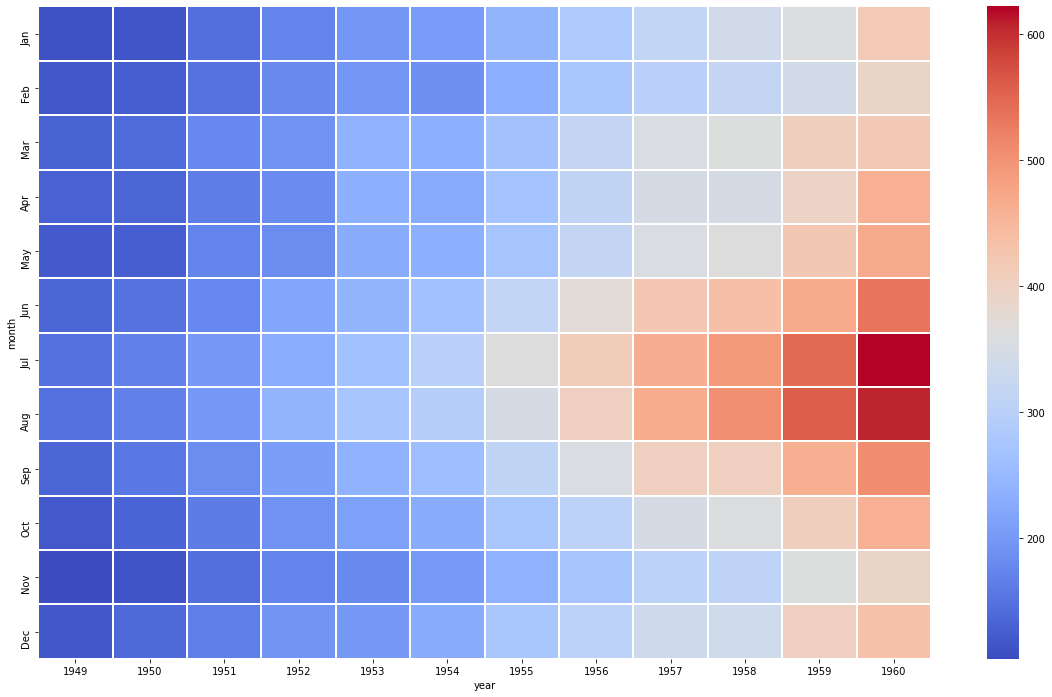

In [26]:
plt.figure(figsize=(20,12))
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights,cmap='coolwarm',linecolor='white',linewidths=1)

# Clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.

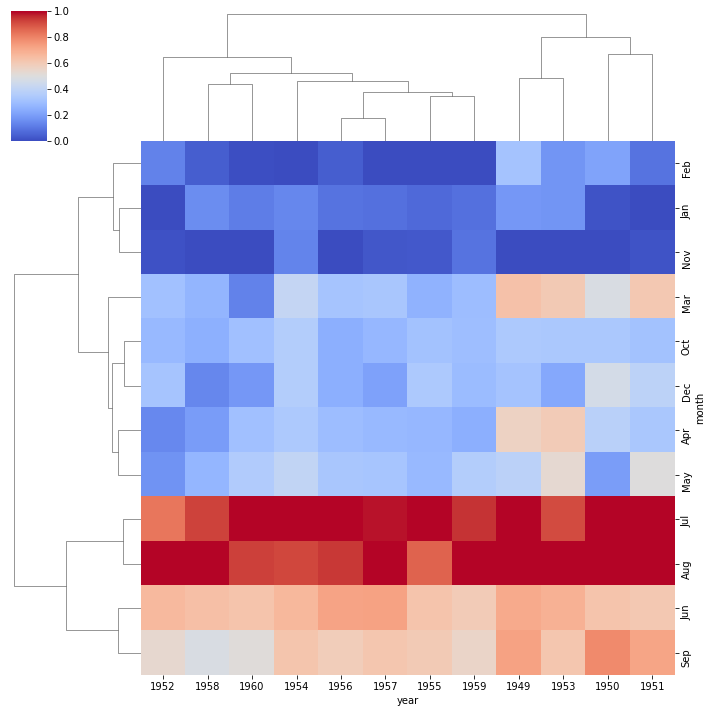

In [27]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

# Final thoughts

Grids - Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features. More advanced plots that allows more customization ina way. E.g., `pairgrid()` is a subplot grid for plotting pairwise relationships in a dataset.

# TRY IT AT HOME: 
Use the famous titanic data set for these exercises.


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. Use a jointplot for `fare` and `age` variable to see if there is any correlation
2. Use a displot to bin the `fare` variable.
3. See if there is any difference in mean age between the 3 passenger class using a boxplot, violin plot and make an inference.

# Further reading

* https://wilkelab.org/SDS375/ - Another good visualization reference from a professor at UT Austin. Plots in this notebook were replicated based on these concepts
* Udemy courses are helpful if you need to dive deep into Matplotlib :-) This notebook is adapted from "Python for Data Science and Machine Learning Bootcamp" course by Jose Portilla, Pierian Data Inc.
* Coursera - Applied plotting, charting & data representation in Python by University of Michigan.
* DataCamp's Python tutorial: Intro to seaborn [Video](https://www.youtube.com/watch?v=sa8p5p376C8)